In [83]:
import tensorflow.keras
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten ,BatchNormalization ,SeparableConv2D
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import os
import numpy as np
import pandas as pd
from scipy.misc import imread
seed = 569874
rng = np.random.RandomState(seed)
import matplotlib.pyplot as pylab
%matplotlib inline

#  Data Building or Preprocessing




## Training Data Set-Up

In [87]:
total_images_train_normal = os.listdir('train/NORMAL/')
total_images_train_pneumonia = os.listdir('train/PNEUMONIA/')

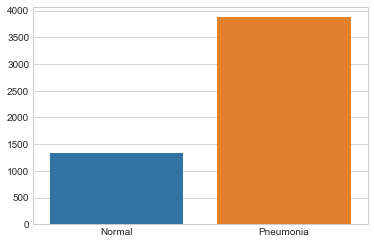

In [88]:
sns.set_style('whitegrid')
sns.barplot(x=['Normal','Pneumonia'],y=[len(total_images_train_normal),len(total_images_train_pneumonia)])

## PREDICTIVE ANALYSIS 

In [89]:
image_height = 150
image_width = 150
batch_size = 10
no_of_epochs  = 10

In [91]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape=(image_height,image_width,3),activation='relu'))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(units=128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [92]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 146, 146, 32)      9248      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 73, 73, 32)        0         
_________________________________________________________________
dropout_42 (Dropout)         (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 71, 71, 64)        18496     
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 69, 69, 64)        36928     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 34, 34, 64)      

In [94]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=15,
                                   shear_range=0.2,
                                   zoom_range=0.2
                                   )

test_datagen = ImageDataGenerator(rescale=1./255)

In [95]:
training_set = train_datagen.flow_from_directory('train',
                                                 target_size=(image_width, image_height),
                                                 batch_size=batch_size,
                                                 class_mode='binary')

test_set = test_datagen.flow_from_directory('test',
                                            target_size=(image_width, image_height),
                                            batch_size=batch_size,
                                            class_mode='binary')

# Updated part --->
val_set = test_datagen.flow_from_directory('val',
                                            target_size=(image_width, image_height),
                                            batch_size=1,
                                            shuffle=False,
                                            class_mode='binary')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [96]:
reduce_learning_rate = ReduceLROnPlateau(monitor='loss',
                                         factor=0.1,
                                         patience=2,
                                         cooldown=2,
                                         min_lr=0.00001,
                                         verbose=1)



In [102]:

history = model.fit_generator(training_set,
                    steps_per_epoch=5216//batch_size,
                    epochs=no_of_epochs,
                    validation_data=test_set,
                    validation_steps=624//batch_size,
                    verbose=2
                   )

Epoch 1/10
521/521 - 724s - loss: 0.1633 - accuracy: 0.9381 - val_loss: 0.2185 - val_accuracy: 0.9145
Epoch 2/10
521/521 - 859s - loss: 0.1568 - accuracy: 0.9381 - val_loss: 0.2546 - val_accuracy: 0.8935
Epoch 3/10
521/521 - 926s - loss: 0.1476 - accuracy: 0.9453 - val_loss: 0.3648 - val_accuracy: 0.8629
Epoch 4/10
521/521 - 885s - loss: 0.1540 - accuracy: 0.9412 - val_loss: 0.2977 - val_accuracy: 0.8935
Epoch 5/10
521/521 - 884s - loss: 0.1377 - accuracy: 0.9502 - val_loss: 0.2751 - val_accuracy: 0.9129
Epoch 6/10
521/521 - 1011s - loss: 0.1382 - accuracy: 0.9489 - val_loss: 0.3240 - val_accuracy: 0.9032
Epoch 7/10
521/521 - 1175s - loss: 0.1380 - accuracy: 0.9506 - val_loss: 0.2269 - val_accuracy: 0.9145
Epoch 8/10
521/521 - 775s - loss: 0.1294 - accuracy: 0.9491 - val_loss: 0.2745 - val_accuracy: 0.9161
Epoch 9/10
521/521 - 719s - loss: 0.1360 - accuracy: 0.9524 - val_loss: 0.2147 - val_accuracy: 0.9371
Epoch 10/10
521/521 - 1009s - loss: 0.1337 - accuracy: 0.9518 - val_loss: 0.3313

In [103]:
model.save('95%_accurate.h5')

In [104]:
print(test_set.class_indices)

{'NORMAL': 0, 'PNEUMONIA': 1}


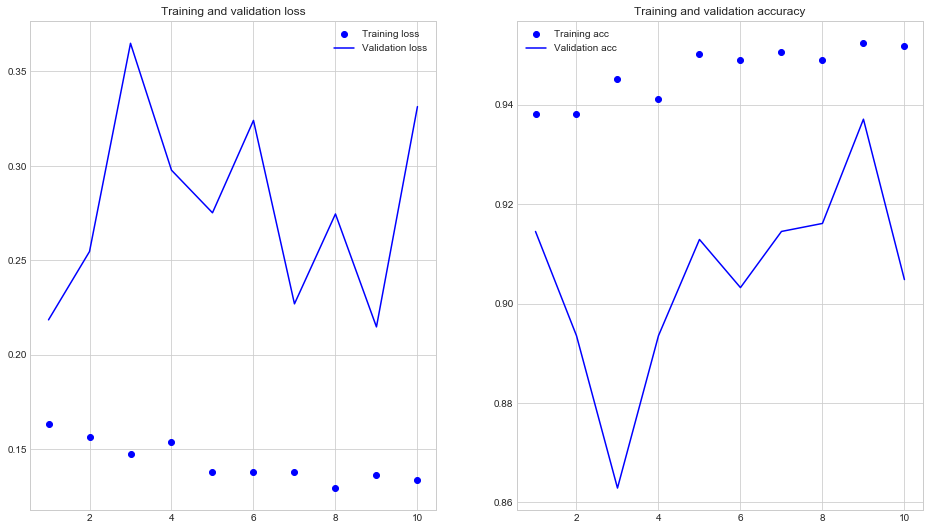

In [107]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
fig = plt.figure(figsize=(16,9))

plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()